In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbkode

In [2]:
def rhs(t, y, p):
    r = np.sqrt(np.sum(y[:2]**2))
    return np.asarray([y[2], y[3], -p[0]*y[0]/r**3, -p[0]*y[1]/r**3])

In [3]:
v0 = .5
b = 10.
d0 = 1.e5
y0 = [d0, b, -v0, 0.]
p = 1.
t0 = 0.

In [4]:
l = (v0 * b) ** 2 / p
e = np.sqrt(v0**2 * l / p  + 1)

In [5]:
solver = nbkode.Heun3(rhs, t0, y0, params=p)

In [6]:
ts = np.linspace(0, 1_000_000, 100_000_000)
ts, vals = solver.run(ts)

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


In [7]:
xs, ys, vxs, vys = vals.T

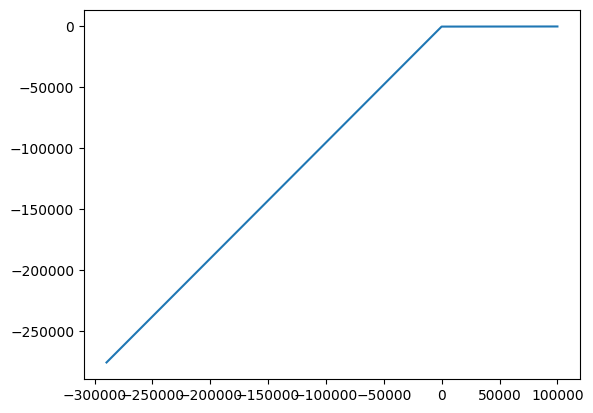

In [8]:
plt.plot(xs, ys)

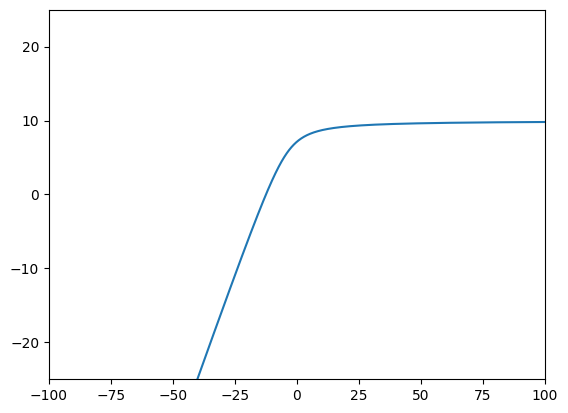

In [9]:
plt.plot(xs, ys)
plt.axis([-100, 100, -25, 25]);

In [10]:
rs = np.sqrt(xs ** 2 + ys ** 2)
i_rmin = np.argmin(rs)
theta0 = np.arctan(ys[i_rmin] / xs[i_rmin]) + np.pi

In [11]:
def get_thetas(xs: np.ndarray, ys: np.ndarray) -> np.ndarray:
    thetas = np.arctan(ys / xs)
    mask = xs < 0
    thetas[mask] += np.pi
    return thetas

In [12]:
thetas = get_thetas(xs, ys)
rs_sol = l / (1 + e * np.cos(thetas - theta0))

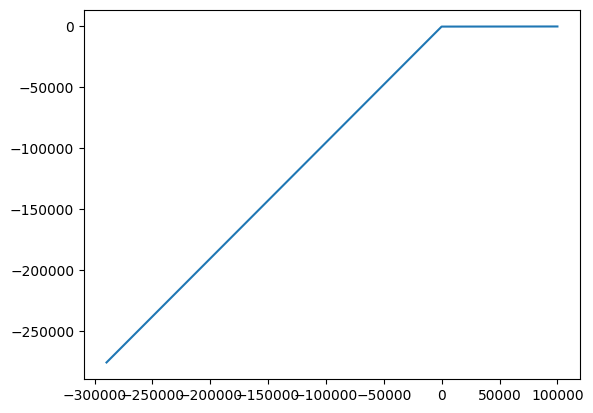

In [15]:
xs_sol, ys_sol = rs * np.cos(thetas), rs * np.sin(thetas)
plt.plot(xs_sol, ys_sol)

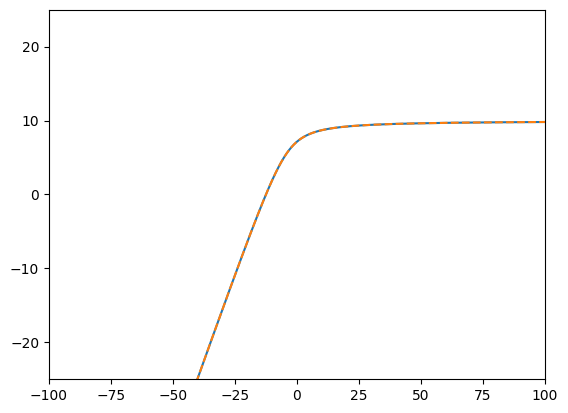

In [16]:
plt.plot(xs, ys)
plt.plot(xs_sol, ys_sol, linestyle='--')
plt.axis([-100, 100, -25, 25]);

In [18]:
en = vxs ** 2 + vys ** 2 - 2/rs
plt.plot(ts, en)